## Introducción
Paysim es una red de dinero móvil en la que comercios, clientes y bancos pueden realizar transacciones de distintos tipos, como las transferencias, pagos, depósitos y retiros. Las transacciones se pueden realizar desde un teléfono celular, usándolo a modo de billetera electrónica.

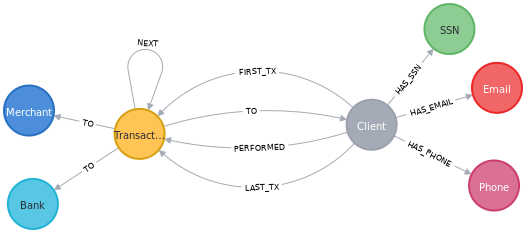

Descargamos el archivo dump del siguiente enlace
https://github.com/neo4j-graph-examples/fraud-detection/blob/main/data/fraud-detection-43.dump


Y lo importamos a una base con la versión 4.4.11 de neo4j

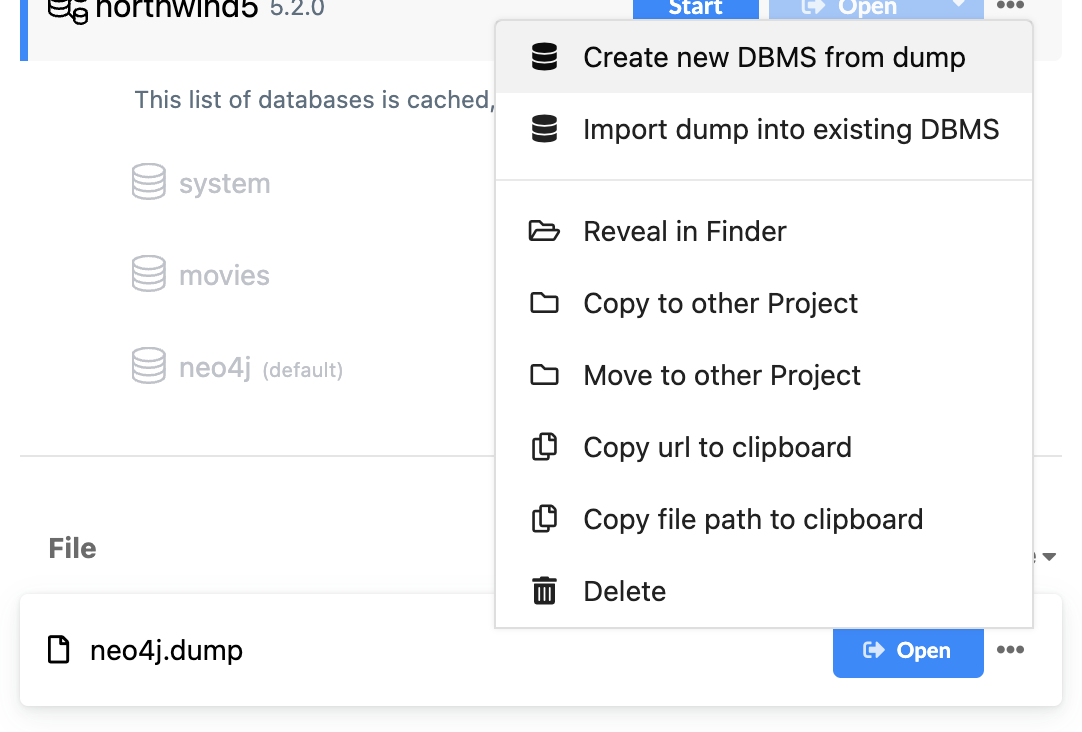

### Configuración de ambiente virtual (opcional)
```python 
# Creación
py -3.8 -m venv test_env
# Activación
.\test_env\Scripts\activate 
```

### Instalación de requisitos
```python
python -m pip install --upgrade pip
pip install -r requirements.txt 
```

In [3]:
# Importar neo4j
import neo4j
from neo4j import GraphDatabase

In [4]:
# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "neo4j://localhost:7687"
AUTH = ("neo4j", "password")

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    driver.verify_connectivity()

In [5]:
# Obtener los 5 IDs de transacción y montos más bajos.
records, summary, keys = driver.execute_query(
    "MATCH (n:Transaction) WHERE n.amount < $amount  RETURN n.id AS txID, n.amount AS amount ORDER BY n.amount DESC LIMIT 5",
    amount=5,
    database_="amlfraud",
)

# Imprimir los resultados iterando en la lista de registros
for transaction in records:
    print(transaction["txID"]+": $"+str(round(transaction["amount"],2)))
 
# Resumen de la consulta ejecutada
print("The query `{query}` returned {records_count} records in {time} ms.".format(
    query=summary.query, records_count=len(records),
    time=summary.result_available_after,
))

C:\Users\Casa\AppData\Local\Temp\ipykernel_20092\2664987578.py:2: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  records, summary, keys = driver.execute_query(


tx-28444: $4.93
tx-44890: $4.38
tx-96955: $3.5
tx-83805: $3.12
tx-319912: $3.03
The query `MATCH (n:Transaction) WHERE n.amount < $amount  RETURN n.id AS txID, n.amount AS amount ORDER BY n.amount DESC LIMIT 5` returned 5 records in 1 ms.


In [6]:
pandas_df = driver.execute_query(
    "MATCH (n:Transaction) WHERE n.amount < $amount  RETURN n.id AS txID, n.amount AS amount ORDER BY n.amount DESC LIMIT 5",
    amount=5,
    database_="amlfraud",
    result_transformer_=neo4j.Result.to_df
)
print(type(pandas_df))

C:\Users\Casa\AppData\Local\Temp\ipykernel_20092\257946528.py:1: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  pandas_df = driver.execute_query(


<class 'pandas.core.frame.DataFrame'>


In [7]:
pandas_df.head()

,txID,amount
0,tx-28444,4.929272
1,tx-44890,4.383748
2,tx-96955,3.497430
3,tx-83805,3.121920
4,tx-319912,3.027023


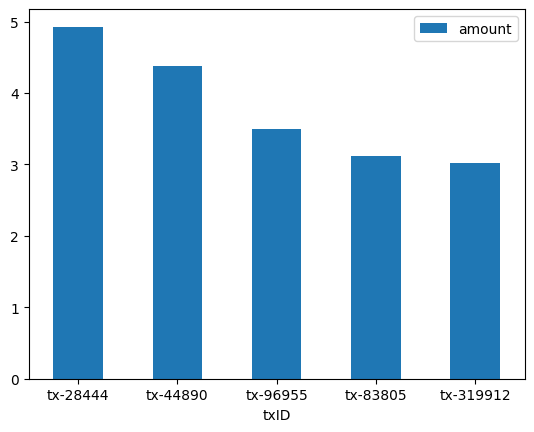

In [19]:
pandas_df.plot(kind='bar', x='txID', y='amount', rot=0);

In [7]:
# Cerrar la conexión
driver.close()

### Recursos Adicionales
* Create a DBMS from a dump file
https://neo4j.com/docs/desktop-manual/current/operations/create-from-dump/
* Build applications with Neo4j and Python
https://neo4j.com/docs/python-manual/current/
* Manipulate query results
https://neo4j.com/docs/python-manual/current/transformers/